In [25]:
import numpy as np
import pylab as pl
import math
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import serial
from __future__ import unicode_literals
from scipy import optimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
def test_func(x,a,b,c):
    return np.abs(c*np.sin(a*np.pi*(x-b))/(np.pi*(x-b)))

In [27]:
xd=np.array([34.49052744,40.36125552,44.03046057,47.69966561,51.36887066,55.03807571,58.70728075,62.3764858,66.04569085,69.7148959,73.38410094,77.05330599,80.72251104,84.39171609,88.06092113,91.73012618,95.39933123,99.06853627,102.73774132,106.40694637])

In [28]:
yd=np.array([0.3231619245, 0.0997980899, 0.1217490035, 0.1289921024, 0.1250134947, 0.0811366555, 0.0958952668, 0.0876420892, 0.0868765745, 0.0995478131, 0.0717387375, 0.0729135744, 0.0615500348, 0.0482816085, 0.0647724509, 0.0487324745, 0.0462651211, 0.0452527926, 0.0731951987, 0.047376421])

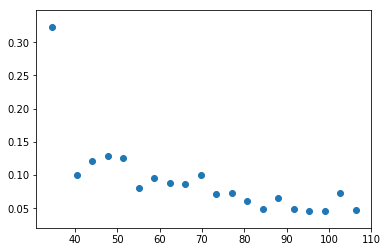

In [29]:
plt.scatter(xd, yd)

In [73]:
params, params_covariance = optimize.curve_fit(test_func, xd, yd, p0=[18,165,75])

In [74]:
params

array([  17.98936893,  165.05148107,  167.24009784])

In [75]:
perr = np.sqrt(np.diag(params_covariance))

In [76]:
perr

array([  1.60600365e-04,   7.27306627e-04,   9.88414019e+00])

In [77]:
nstd = 1. # to draw 5-sigma intervals
params_up = params + nstd * perr
params_dw = params - nstd * perr

fit = test_func(xd, *params)
fit_up = test_func(xd, *params_up)
fit_dw = test_func(xd, *params_dw)

In [78]:
Err=np.array([0.0925065222, 0.0257562677, 0.0181628275, 0.0182189791, 0.0269709143, 0.0053601573, 0.0108811132, 0.006123477, 0.0071560767, 0.0096863242, 0.0126950288, 0.0161535444, 0.0127801699, 0.0024301812, 0.0046268084, 0.0079257966, 0.0020837625, 0.0048717655, 0.0285322362, 0.0044245478, 0.0])
Err

array([ 0.09250652,  0.02575627,  0.01816283,  0.01821898,  0.02697091,
        0.00536016,  0.01088111,  0.00612348,  0.00715608,  0.00968632,
        0.01269503,  0.01615354,  0.01278017,  0.00243018,  0.00462681,
        0.0079258 ,  0.00208376,  0.00487177,  0.02853224,  0.00442455,  0.        ])

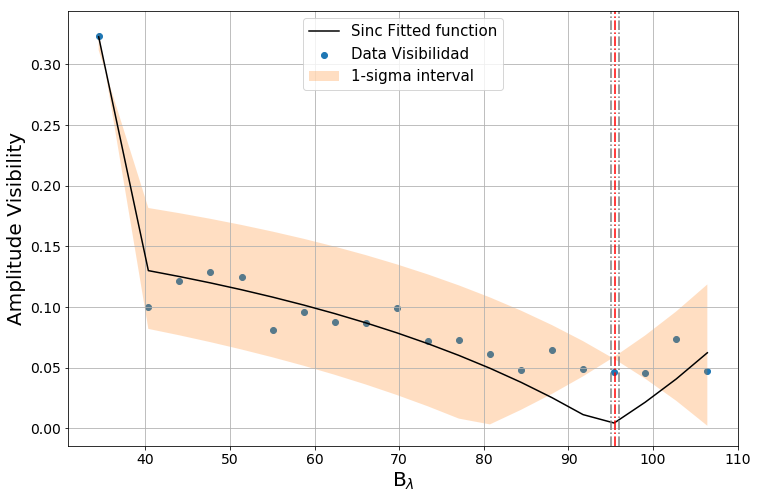

In [79]:
#plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(1, figsize=(12, 8))
plt.scatter(xd, yd, label='Data Visibilidad')
plt.plot(xd, test_func(xd,params[0],params[1],params[2]),label='Sinc Fitted function', color='black')
#plt.errorbar([xd], [yd], xerr=0, yerr=[Err], fmt='o', color='red', ecolor='navy', elinewidth=2, capsize=2, label="Error")
#plot(xd, fit, 'r', lw=2, label='best fit curve')
ax.fill_between(xd, fit_up, fit_dw, alpha=.25, label='1-sigma interval')
pl.axvline(96, linestyle='-.',color='grey')
pl.axvline(95, linestyle='-.',color='grey')
pl.axvline(95.5, linestyle='-.',color='red')
plt.xlabel('B$_\lambda$', size=20)
plt.xticks(fontsize=14, rotation=0)
plt.ylabel('Amplitude Visibility', size=20)
plt.yticks(fontsize=14, rotation=0)
plt.legend(loc='upper center',fontsize=15)
plt.grid(True)
plt.figure(figsize=(12, 8))
filename = '/home/alfazoom/imfr-hal/python/Sesion24.08.2018/IMFR11GHz-full average-Visibilidad-fitted-02.jpg'
plt.savefig(filename, dpi = 300)
plt.show()

In [11]:
params[0]

17.989368925809583

In [12]:
params[1]

165.05148106986107

In [13]:
params[2]

167.24009783854805

# Calculo IMFR11GHz

In [16]:
pi=3.14159265359

In [17]:
Null_IMFR11GHz_B_lambda = 95.5

In [18]:
null_IMFR11GHz = 1/Null_IMFR11GHz_B_lambda
null_IMFR11GHz

0.010471204188481676

In [19]:
Dsol_grad = (360*null_IMFR11GHz)/(2*pi)
Dsol_grad

0.5999558064196707

In [20]:
Dsol_min = Dsol_grad*60

In [21]:
print("Diametro Sol at 11GHz =", Dsol_min, "minutos de arco")

('Diametro Sol at 11GHz =', 35.997348385180246, 'minutos de arco')


In [8]:
print("FIN")

FIN


In [22]:
Dreal=725.27*Dsol_min*60

In [24]:
print("Diametro Sol =",Dreal,"km")

('Diametro Sol =', 1566467.8117991805, 'km')


In [25]:
Dsun_google=1391016

In [26]:
error=1-(Dreal/Dsun_google)

In [27]:
error

-0.12613213061473094